# Intermediate Data Analysis in Python

"This survey is the result of a partnership between Axios and Harris Poll to gauge the reputation of the most visible brands in America, based on 20 years of Harris Poll research. From Trader Joe's to Disney, here's how this year's class stacks up.

"Methodology: The Axios Harris Poll 100 is based on a survey of 33,096 Americans in a nationally representative sample conducted March 11-April 3, 2022. The two-step process starts fresh each year by surveying the public’s top-of-mind awareness of companies that either excel or falter in society.

"These 100 'most visible companies' are then ranked by a second group of Americans across the seven key dimensions of reputation to arrive at the ranking. If a company is not on the list, it did not reach a critical level of visibility to be measured."

The data set is currently hosted in the TidyTuesday repository: https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-05-31

In [73]:
import matplotlib.pyplot as plt # to add labels and other customization to plots
import numpy as np              # advanced calculations (i.e. beyond arithmetic)
import pandas as pd             # treat incoming data as data frames
import seaborn as sns           # modern graphing software
import scipy                    # advanced calculations (college level)

Since we have CSV files (comma-separated values), we can use the `read_csv` function in the `pandas` package to load the file into our current programming session.

In [74]:
reputation = pd.read_csv("reputation.csv")
reputation_wide = pd.read_csv("reputation_wide.csv")

# Reshaping Data Frames

You have noticed that for these examples, I have employed two slightly different data frames.  Each had situations where it was then easier to employ Python code.  Those data frames were made with the `melt()` and `pivot()` methods.

In [75]:
#reputatation_long = pd.melt(reputation_wide,
#                            id_vars = ['company', 'industry'],
#                            var_name = 'name',
#                            value_name = 'score')

In [76]:
#reputation_wide = reputation.pivot(index = ['company', 'industry'], columns = 'name', values = 'score')
#reputation_wide.head()

# Confidence Intervals

If our data is a *sample*, can we generalize to a larger *population*?  The field of statistics employs **confidence intervals**.

For example, what is the true population mean for the ethics score for the food delivery industry?  We can use the a bootstrap distribution to handle the simulation and computation.

In [77]:
reputation_subset = reputation_wide[reputation_wide.industry == 'Food Delivery']
bootstrap_dist = [np.random.choice(reputation_subset.ethics,
                                   size = len(reputation_subset.ethics),
                                   replace = True).mean()
                  for i in range(1000)]
np.percentile(bootstrap_dist, [2.5, 97.5])

array([70.5, 74.6])

We are 95 percent confident that the true population mean for the ethics score for the food delivery industry is in between 70.5 and 74.6 (on a scale from 0 to 100).

# Hypothesis Testing

## Example 1

* null hypothesis: the healthcare and media industries have the same reputation score
* alternative hypothesis: the healthcare and media industries have different reputation scores

$$H_{o}: \mu_{1} = \mu_{2}$$
$$H_{a}: \mu_{1} \neq \mu_{2}$$

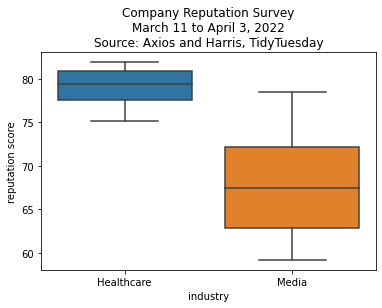

In [78]:
reputation_subset = reputation[reputation.industry.isin(['Healthcare', 'Media'])]

my_plot = sns.boxplot(x = reputation_subset.industry, y = reputation_subset.score)
my_plot.set(title = "Company Reputation Survey\nMarch 11 to April 3, 2022\nSource: Axios and Harris, TidyTuesday",
            xlabel = "industry", ylabel = "reputation score")
plt.show(my_plot)

In [79]:
group_A = reputation[reputation.industry == 'Healthcare']
group_B = reputation[reputation.industry == 'Media']
t_statistic, p_value = stats.ttest_ind(group_A.score, group_B.score)
print(p_value)

2.664685771799002e-08


Since the p-value < 0.05, we reject the claim of equal means between the healthcare and media industries.

## Example 2

* null hypothesis: the pharmacy and retail industries have the same reputation score
* alternative hypothesis: the pharmacy and retail industries have different reputation scores

$$H_{o}: \mu_{1} = \mu_{2}$$
$$H_{a}: \mu_{1} \neq \mu_{2}$$

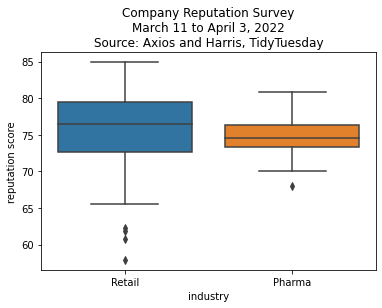

In [80]:
reputation_subset = reputation[reputation.industry.isin(['Pharma', 'Retail'])]

my_plot = sns.boxplot(x = reputation_subset.industry, y = reputation_subset.score)
my_plot.set(title = "Company Reputation Survey\nMarch 11 to April 3, 2022\nSource: Axios and Harris, TidyTuesday",
            xlabel = "industry", ylabel = "reputation score")
plt.show(my_plot)

In [81]:
group_A = reputation[reputation.industry == 'Retail']
group_B = reputation[reputation.industry == 'Pharma']
t_statistic, p_value = stats.ttest_ind(group_A.score, group_B.score)
print(p_value)

0.43347789772194834


Since the p-value > 0.05, we fail to reject the claim of equal means between the pharmacy and retail industries.

# Correlation Matrix

To visualize many correlation values between pairs of numerical variables, we can build a correlation matrix.

In [89]:
reputation_numeric = reputation_wide.select_dtypes(include = [np.number])
reputation_numeric.corr().style.background_gradient(cmap = 'coolwarm').format(precision = 2)

,trust,ethics,growth,p_s,citizenship,vision,culture
trust,1.00,0.96,0.82,0.85,0.96,0.85,0.90
ethics,0.96,1.00,0.86,0.87,0.96,0.89,0.93
growth,0.82,0.86,1.00,0.90,0.85,0.95,0.92
p_s,0.85,0.87,0.90,1.00,0.84,0.90,0.93
citizenship,0.96,0.96,0.85,0.84,1.00,0.85,0.90
vision,0.85,0.89,0.95,0.90,0.85,1.00,0.92
culture,0.90,0.93,0.92,0.93,0.90,0.92,1.00


# Ranking

In this longer example, I am going to show you an example of improving a graph iteratively for clarity.

* Query: What are the top 10 companies for workplace culture?

Let us start with the framework for a bar chart.

<AxesSubplot:xlabel='company', ylabel='culture'>

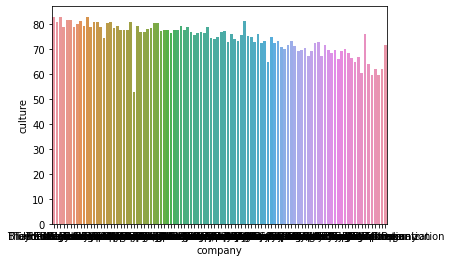

In [83]:
sns.barplot(x = reputation_wide.company, y = reputation_wide.culture)

Let us reorder the bars from highest to lowest values.

<AxesSubplot:xlabel='company', ylabel='culture'>

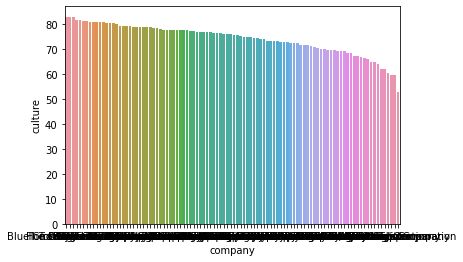

In [84]:
reputation_sorted = reputation_wide.sort_values(['culture'], ascending = False)
sns.barplot(x = reputation_sorted.company, y = reputation_sorted.culture)

The graph is still crowded, so let us focus on the top 10 companies.

<AxesSubplot:xlabel='company', ylabel='culture'>

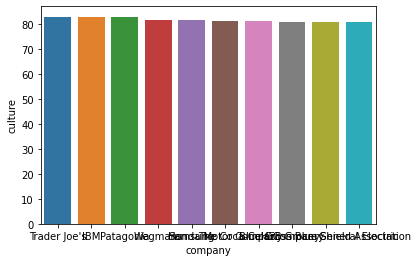

In [85]:
reputation_sorted = reputation_wide.sort_values(['culture'], ascending = False).head(10)
sns.barplot(x = reputation_sorted.company, y = reputation_sorted.culture)

The labels for the company names are overlapping and still hard to read.  One way to ease the congestion is to switch what are on the x- and y-axes.

<AxesSubplot:xlabel='culture', ylabel='company'>

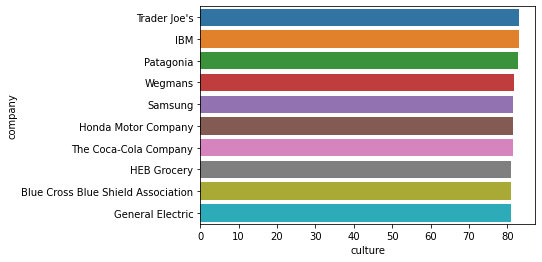

In [86]:
sns.barplot(x = reputation_sorted.culture, y = reputation_sorted.company)

Finally, let us place titles on the graph

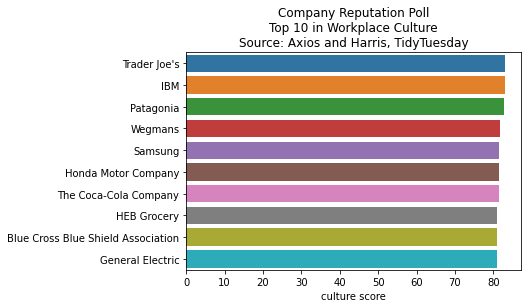

In [87]:
my_plot = sns.barplot(x = reputation_sorted.culture, y = reputation_sorted.company)
my_plot.set(title = "Company Reputation Poll\nTop 10 in Workplace Culture\nSource: Axios and Harris, TidyTuesday",
            xlabel = "culture score", ylabel = "")
plt.show(my_plot)